## Run edt algorithm on in vivo Texas-Red stack (single channel)

In [1]:
import os

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

import tifffile

## Utility Functions

In [2]:
gNumBins = 250

def printStackInfo(name, localData):
    flatStack = np.ravel(localData[~np.isnan(localData)])
    mean = np.nanmean(flatStack)
    std = np.nanstd(flatStack)
    cv = std/mean
    pcv = cv * 100 # cv as a percentage
    #cv2 = scipy.stats.variation(flatStack)
    #kurtosis = scipy.stats.kurtosis(flatStack)
    #skew = scipy.stats.skew(flatStack)

    print(name, 
          stackData.shape, 
          stackData.dtype, 
          'min:', np.nanmin(stackData), 
          'max:', np.nanmax(stackData), 
          'mean:', round(mean,2),
          'std:', round(std,2),
          'CV:',round(cv,2),
          'pCV:',round(pcv,2),
          #'kurtosis:', kurtosis,
          #'skew:', skew,
         )


## Load EDT

In [3]:
path = '/Users/cudmore/box/data/nathan/20200420/invivo/analysis/20190613__0028_ch2_9_edt.tif'
stackData = tifffile.imread(path)
printStackInfo('in vivo', stackData)

in vivo (204, 512, 512) float32 min: 0.0 max: 101.79879 mean: 15.07 std: 11.79 CV: 0.78 pCV: 78.25


## Plot histogram of EDT

in vivo (204, 512, 512) float32 min: 0.0 max: 101.79879 mean: 15.07 std: 11.79 CV: 0.78 pCV: 78.25


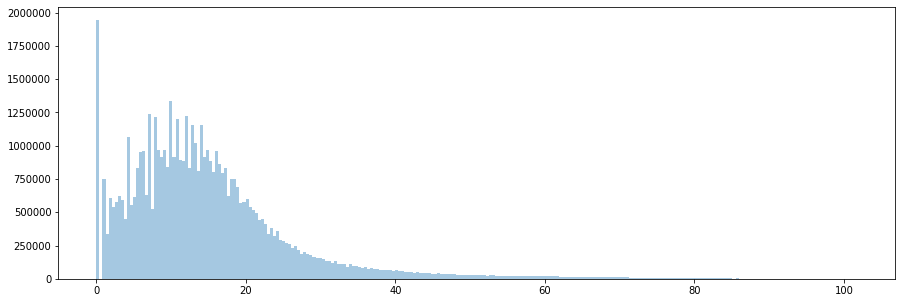

In [4]:
fig, axs = plt.subplots(1, 1, sharey=False, figsize=(15,5))


# 0
ax = axs
printStackInfo('in vivo', stackData)
g = sns.distplot(stackData, bins=gNumBins, hist=True, kde=False, norm_hist=False, ax=ax)


## Remove short distances and plot histogram of EDT

in vivo (204, 512, 512) float32 min: 1.4062513 max: 101.79879 mean: 15.85 std: 11.58 CV: 0.73 pCV: 73.07


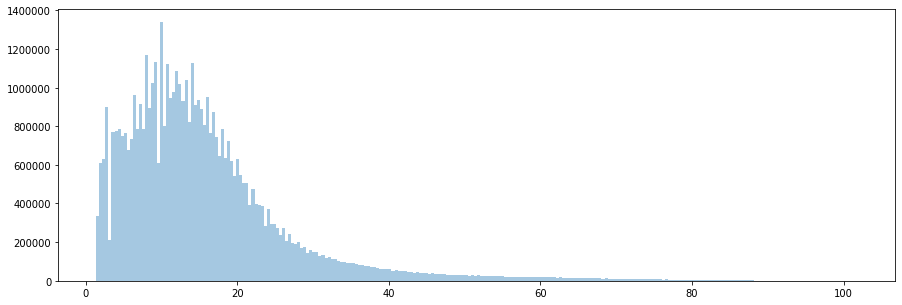

In [5]:
removeLessThanUm = 1
stackData[stackData<=removeLessThanUm] = np.nan # this will give a warning but seems ok
printStackInfo('in vivo', stackData)

#
# plot again
fig, axs = plt.subplots(1, 1, sharey=False, figsize=(15,5))
ax = axs # just one plot
g = sns.distplot(stackData, bins=gNumBins, hist=True, kde=False, norm_hist=False, ax=ax)


## Plot again with gaussian fit

stackData2 (204, 512, 512) float32 min: 1.4062513 max: 101.79879 mean: 15.85 std: 11.58 CV: 0.73 pCV: 73.07
sigma: 8.863946099008935


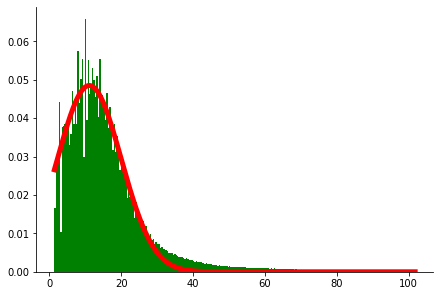

In [6]:
def myGaussianFit(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

histColor = 'g'
fitColor = 'r'

fig, ax = plt.subplots(1, 1, sharey=False, figsize=(6,4), constrained_layout=True)

stackData2 = stackData[~np.isnan(stackData)].copy()
printStackInfo('stackData2', stackData2)

# plot histogram
counts, bins, bars = ax.hist(stackData2, bins=gNumBins, density=True, color=histColor)

xStart = np.min(bins)
xStop = np.max(bins)
x = np.linspace(xStart,xStop,gNumBins) # 
y = counts
# weighted arithmetic mean
gMean = sum(x * y) / sum(y)
gSigma = np.sqrt(sum(y * (x - gMean)**2) / sum(y))
poptGaus, pcovGaus = scipy.optimize.curve_fit(myGaussianFit, x, y, p0=(max(y), gMean, gSigma)) # max(y), mean, sigma
gaus1 = poptGaus[0] # a
gaus2 = poptGaus[1] # x0
gaus3 = poptGaus[2] # sigma

print('sigma:', gaus3)
    
# to plot the fit
xFit = x
yFit = myGaussianFit(x,gaus1, gaus2, gaus3)

# plot the fit
fitColor = fitColor + '-'
ax.plot(xFit, yFit, fitColor, lw=5)

# tweek how it looks
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
